# Visualisation Solutions

In this activity we will be working on the visualisation of data. Questions to be answered are in ***bold*** and should be answered in the same box unless specified. In the code, some parts need to be filled. This will be marked with __ or be empty spaces. Note that the code will not work if these are not changed to the correct values, so make sure that you change all of them.

In [178]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import seaborn as sns
import pandas as pd
from collections import Counter
#Make sure the helper_functions.py file is in the same folder as this notebook
from helper_functions import get_vgs_proportion


In [2]:
#Get the path to the files we will be using.
path_weather = os.path.join(os.getcwd(), 'datasets', 'weather_simple.csv')
path_videogames = os.path.join(os.getcwd(), 'datasets', 'vgsales.csv')
#Load the data into the countries_info variable. This results in a DataFrame object.
weather = pd.read_csv(path_weather, delimiter = ';')
videogames = pd.read_csv(path_videogames, delimiter = ',')

In [3]:
#Looking at the data we will need 
weather

,Date,Weather,Rain(mm),Min_Temperature,Max_Temperature
0,01/01/2019,Sunny,0,10.0,22.0
1,02/01/2019,Sunny,0,11.5,23.5
2,03/01/2019,Cloudy,0,9.0,24.0
3,04/01/2019,Cloudy,0,10.0,22.5
4,05/01/2019,Rainy,0,12.0,21.0
5,06/01/2019,Rainy,30,10.5,23.0
6,07/01/2019,Cloudy,0,13.0,24.0
7,08/01/2019,Cloudy,0,11.0,22.0
8,09/01/2019,Rainy,30,10.5,23.0
9,10/01/2019,Rainy,35,12.0,22.5


In [4]:
#Look at the other dataset
videogames

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Activity 1: Using the right chart

Here you are given selections of the two datasets that we have loaded. Your job is to find the right plot to use for each of them and represent them. The following cell contains code that you can copy and paste for representing the data. Remember to substitute the appropriate variable names.

Code for drawing a pie chart. Copy, paste, and substitute with your own data
```
data.plot.pie(subplots=True)
        ```
Code for drawing a line chart. Copy, paste, and substitute with your own data
```
data.plot.line
plt.legend(['_'])
```
Code for drawing a bar chart. Copy, paste, and substitute with your own data
```
data.plot.bar()
plt.legend(['_'])
```
Code for stacked 100% area chart
```
data.plot.area()
```

In [5]:
#Let's get all the data that we will represent now

#Number of kind of days (cloudy, sunny, rainy)
kind_days = Counter(weather['Weather']) #Counts how many days of each kind there are
num_kind_days = pd.DataFrame.from_dict(kind_days, orient='index')

#Maximum temperatures
max_temp = weather['Max_Temperature']

#Minimum temperatures
min_temp = weather['Min_Temperature']

#Amount of rain
rain = weather['Rain(mm)']

#Proportion of sold videogames for each Nintendo platform per year
#There is some processing of the data to get the necessary dataset. You can look at it
#in the helper_functions.py file
prop_videogames = get_vgs_proportion() 


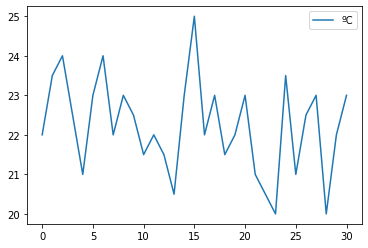

In [157]:
#Your chart 1
max_temp.plot.line()
plt.legend(['ºC'])

***Explain your choice:***

Temperature is continuous data, so a line chart is the best option to represent it

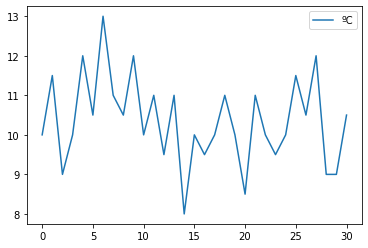

In [158]:
#Your chart 2
min_temp.plot.line()
plt.legend(['ºC'])

***Explain your choice:***

Same answer as before

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2475BCF98>],
      dtype=object)

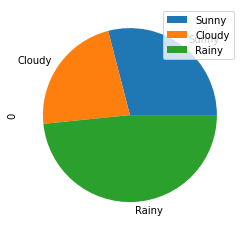

In [147]:
#Your chart 3
num_kind_days.plot.pie(subplots=True)

***Explain your choice:***

We are looking at the proportion over a month, so a pie chart gives us a visual representation of it.

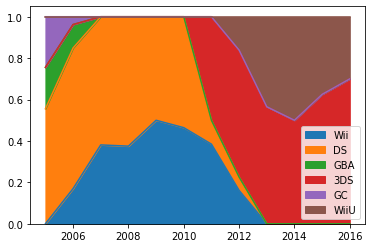

In [156]:
#Your chart 4
#print(prop_videogames)
prop_videogames.plot.area()

***Explain your choice:***

We are looking at proportion over time, the proportion of each platform at each year and how that evolves over time. This plot gives us a visualisation of this.

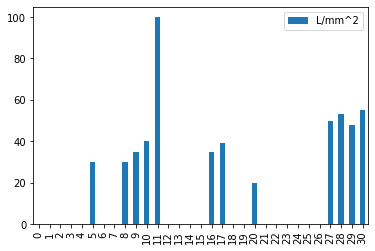

In [183]:
#Your chart 5
rain.plot.bar()
plt.legend(['L/mm^2'])

***Explain your choice:***

The quantity of rain is not continuous, there is a different amount each day. Because of this, the best visualisation is with bars.

## Activtity 2: Correcting plots

Correct the following plots. Mistakes could be axis wrongly labeled, bad colour decision ([here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) you have a link to different colormaps you can use), not the right plot for the data...

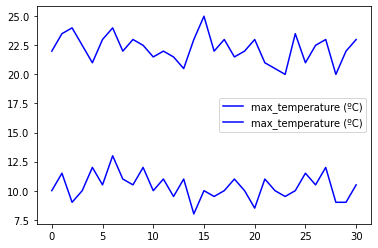

In [17]:
plt.plot(min_temp, color = 'blue', label = 'max_temperature (ºC)')
plt.plot(max_temp, color = 'blue', label = 'max_temperature (ºC)')
plt.legend()

***Explain the error(s) you found:***

1- Same colours for both lines
2- Legend has the same label for both lines

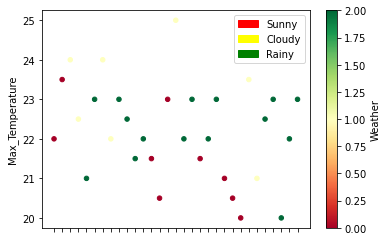

In [182]:
#We need to change the weather values to numbers for them to have different colours
weather_scatter =weather.replace(['Sunny', 'Cloudy', 'Rainy'],[0,1,2])
weather_scatter.plot.scatter(x='Date', y = 'Max_Temperature', c = 'Weather', colormap = 'RdYlGn')

#This is for representing the legend
sunny_patch = mpatches.Patch(color='red', label='Sunny')
cloudy_patch= mpatches.Patch(color='yellow', label='Cloudy')
rainy_patch = mpatches.Patch(color='green', label='Rainy')
plt.legend(handles=[sunny_patch, cloudy_patch,rainy_patch])
plt.show()

***Explain the error(s) you found:***

Here the colours green and red are not a good combination for colourblind people. There are also yellow points that are very hard to see as it is a very light colour. 

Note: In the correction of the plot the student should also correct the colours of the legend

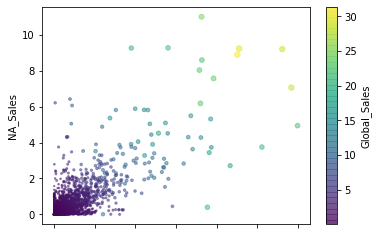

In [223]:
vg_selection = videogames.loc[videogames['NA_Sales'] <=15]
vg_selection.plot.scatter(x='NA_Sales', y='EU_Sales',c='Global_Sales',s=vg_selection['Global_Sales'], alpha=0.5, colormap='viridis')
plt.ylabel('NA_Sales')
plt.xlabel('EU_Sales')
plt.show()

***Explain the error(s) you found:***

The labels for the x and y axis are swapped

## Activity 3: Stories with data

 

The year is 2008. Imagine you work at a videogames company. Your company wants to develop a game for one of the Sony platforms, but they need you to decide which of them will be the best option. To do that, you get historical data on how many videogames have been sold per year in each of the Sony platforms since 1980.

In our data, the platforms we will be looking at are called "PS" (Play Station), "PS2" (Play Station 2), "PS3" (Play Station 3), "PS4" (Play Station 4), "PSP" (Play Station Portable) and "PSV" (Play Station Vita). We will now select these individually.

In [118]:
#First we take the data until 2007 included
videogames_2007 = videogames.loc[videogames['Year'] <= 2007]

#Now we select the platforms. 
ps = videogames_2007.loc[videogames_2007['Platform'] == 'PS']
ps2 = videogames_2007.loc[videogames_2007['Platform'] == 'PS2']
ps3 = videogames_2007.loc[videogames_2007['Platform'] == 'PS3']
ps4 = videogames_2007.loc[videogames_2007['Platform'] == 'PS4']
psp = videogames_2007.loc[videogames_2007['Platform'] == 'PSP']
psv = videogames_2007.loc[videogames_2007['Platform'] == 'PSV']

The data we have extracted tells us how many copies of each specific videogame has been sold each year in specific regions or around the world. We need to know how many videogames have been sold in total eaach year for each platform to decide which is selling the most and choose that. To do this, we will add all the videogames sold globally (the "Global_Sales" tag) in a year for each platform.

In [160]:
years = sorted(videogames.Year.unique())

#Calculate the total for ps
def total_platform(a):
    #Create the DataFrame for our data
    total_years = pd.DataFrame(data = [],index = years, columns = ['Global_Sales'])
    for year in years:
        #Calculate the total in that year
        total_year = a.loc[a['Year'] == year, 'Global_Sales'].sum()
        #Save the total into our DataFrame
        total_years.at[year, 'Global_Sales'] = total_year
    return total_years

#Read the function defined above and try to find out what the variable 'a' is. 
#Using the defined function, fill in the following values.
total_ps = total_platform(ps)
total_ps2 = total_platform(ps2)
total_ps3 = total_platform(ps3)
total_ps4 = total_platform(ps4)
total_psp = total_platform(psp)
total_psv = total_platform(psv)

***Based on the defined function, can you explain what data we have now for each platform, referring to their rows and columns?***

Now we have how many videogames have been sold in total each year in each of the platforms.


Let us now look at the million of games sold during 2007 for each of the platforms.


***Beofre looking at the numbers, intuitively, which platform would you pick based on sales from the previous year? The one with most sales? The one with the least? Something else?***

Intuitively it would be the platform with more sales on the previous year, but this could be misleading (see the rest of the exercise)

In [140]:
#Fill in the year we are looking at
print("PS:", total_ps.loc[2007, 'Global_Sales'])
print("PS2:", total_ps2.loc[2007, 'Global_Sales'])
print("PS3:", total_ps3.loc[2007, 'Global_Sales'])
print("PS4:", total_ps4.loc[2007, 'Global_Sales'])
print("PSP:", total_psp.loc[2007, 'Global_Sales'])
print("PSV:", total_psv.loc[2007, 'Global_Sales'])


PS: 0.0
PS2: 76.0
PS3: 73.81
PS4: 0.0
PSP: 47.48
PSV: 0.0


We now have the millions of copies of videogames sold on each of the Sony platforms in 2007. 


***Which one is the platform with more sold copies? Is this alone enough to decide on what platform we want to sell our game?***

The platform with more sold copies is PS2. This is not enough to decide the platform, as we do not know if this number is increasing or decreasing, which would mean that PS3 might be a better option

In this case,we can not look at data from only one year, but how they are evolving. Previously, we saw that PS2 had slightly more sales than PS3 the year before, but that does not mean that they will sell the most in PS2 next year. The way we can determine this is by looking at the trend, if sales are going up or down, through a graph

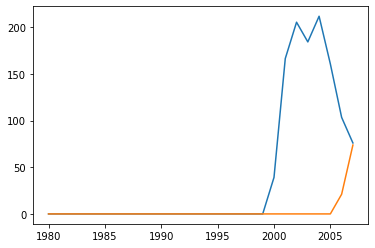

In [139]:
plt.plot(total_ps2.iloc[:28])
plt.plot(total_ps3.iloc[:28])

***Seeing the trend now, which platform do you think it would be better to release the game on? Why?***

The best platform to release the game on would be Play Station 3. This is because the sales of games in that platform are increasing, while the sales in Play Station 2 are decreasing. Following the tendency, during 2008 there should be more sales in the PS3 platform than the PS2. (this can actually be checked looking at the dataset values for 2008)

We have only looked at the Sony platforms, but there are other categories in the dataset that could help us decide on which platform we want our game to be released. 


***Looking through the original dataset, can you name one of these and give a reason why it would be a good characteristic to look at?***

One of the characteristics to look at would be the genre of the game (sports, role play, etc). Depending on the genre, it could be sold more in some platforms than others. 

It could also be one of the sale numbers in specific regions. For example, if the game is only going to be sold in Europe, it is better to look at sales in this area than worlwide.